# MLP Model

In [39]:
## Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import os

In [40]:

## Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Feature Data
filename = "features.csv"
output_data = "../../data/output" 
filepath = os.path.join(output_data,filename)

data = pd.read_csv(filepath,index_col=False, header=0)
print(len(data))
data.head()

339


,Solar,Energy,year,Price,REDTI,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,2.965,2018.869,1990,7.17,8.8,1,0,0,0,0,0,0,0,0,0,0,0
1,3.196,1640.310,1990,7.48,22.7,0,1,0,0,0,0,0,0,0,0,0,0
2,4.403,1559.289,1990,7.57,29.8,0,0,1,0,0,0,0,0,0,0,0,0
3,4.853,1299.971,1990,7.69,26.8,0,0,0,1,0,0,0,0,0,0,0,0
4,5.357,1143.417,1990,7.96,53.9,0,0,0,0,1,0,0,0,0,0,0,0


In [41]:
def lag_data(lag_count, df):
    features = []
    targets = []
    for i in range(1, lag_count+1):
        df['lag%s' % i] = df.Solar.shift(i)
        df['peek%s' % i] = df.Solar.shift(-1*i)
        features.append('lag%s' % i)
        targets.append('peek%s' % i)
        
    #differencing
    df['diff1'] = df.Solar.diff(1)
    return features, targets, df.iloc[lag_count:-1*lag_count] #dropped rows with nan
    
lag_count = 12
features, targets, data = lag_data(lag_count, data)

print(len(data))

315


In [42]:
print(features, targets)

['lag1', 'lag2', 'lag3', 'lag4', 'lag5', 'lag6', 'lag7', 'lag8', 'lag9', 'lag10', 'lag11', 'lag12'] ['peek1', 'peek2', 'peek3', 'peek4', 'peek5', 'peek6', 'peek7', 'peek8', 'peek9', 'peek10', 'peek11', 'peek12']


## Improve model by adding features

In [43]:
X = data[["year", "Price", "lag1", "peek1", "lag2", "peek2", "lag3", "peek3","lag4","peek4","lag5", "peek5","lag6", "peek6", "lag7", "peek7", "lag8", "peek8", "lag9", "peek9", "lag10","peek10", "lag11","peek11"]] 
y = data["Solar"].values.reshape(-1, 1)
print(X.shape, y.shape)

(315, 24) (315, 1)


## Split dataset into Train and Test

Given the dataset is a time series, we will leave the last 12 months as test data.

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data into Train and Test

X_train, X_test = X[1:len(X)-12], X[len(X)-12:]
y_train, y_test = y[1:len(X)-12], y[len(X)-12:]


## Scale the data and plot the difference

In [45]:
# Scale the data
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

y_scaler = StandardScaler().fit(y_train)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
print(len(X_train), len(X_test), len(y_train), len(y_test))
print("train observations ", len(X_train_scaled), "test observations: ",len(X_test_scaled))

302 12 302 12
train observations  302 test observations:  12


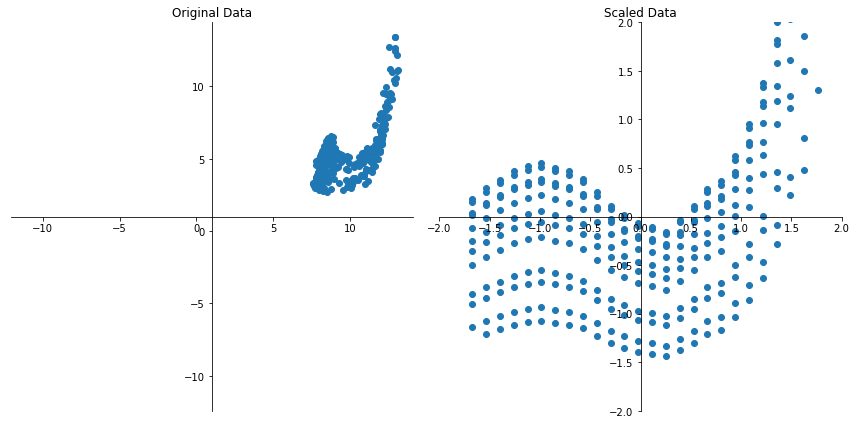

In [46]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train["Price"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["Price"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])
# Save our graph 
plt.tight_layout()
plt.savefig("../../images/LR_scaled_features.png")
plt.show()


## Create the MLP model

Train the model and plot results

In [47]:
from sklearn.neural_network import MLPRegressor
print("Row number of testing data : ", len(X_test_scaled))

# train autoregression
mlp = MLPRegressor(max_iter=1000, learning_rate_init=0.1, random_state=0, learning_rate='adaptive',
                   activation='relu', solver='adam', tol=0.0, verbose=2 , hidden_layer_sizes = (20,20))



Row number of testing data :  12


In [48]:
import numpy as np
y_train_ravel = np.ravel(y_train_scaled)
mlp.fit(X_train_scaled, y_train_ravel)

Iteration 1, loss = 5.24353292
Iteration 2, loss = 2.03086308
Iteration 3, loss = 0.41532253
Iteration 4, loss = 0.40768384
Iteration 5, loss = 0.19137981
Iteration 6, loss = 0.17743926
Iteration 7, loss = 0.17371502
Iteration 8, loss = 0.11268844
Iteration 9, loss = 0.17287228
Iteration 10, loss = 0.10680940
Iteration 11, loss = 0.10896848
Iteration 12, loss = 0.06630323
Iteration 13, loss = 0.08836251
Iteration 14, loss = 0.05431658
Iteration 15, loss = 0.06008242
Iteration 16, loss = 0.03089377
Iteration 17, loss = 0.04792155
Iteration 18, loss = 0.02298896
Iteration 19, loss = 0.03844996
Iteration 20, loss = 0.03312612
Iteration 21, loss = 0.02367918
Training loss did not improve more than tol=0.000000 for two consecutive epochs. Stopping.


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20, 20), learning_rate='adaptive',
       learning_rate_init=0.1, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='adam', tol=0.0, validation_fraction=0.1, verbose=2,
       warm_start=False)

In [49]:
y_pred = mlp.predict(X_test_scaled)

In [50]:
mlp.score(X_test_scaled, y_test_scaled)

0.7641087240871138

In [51]:
from sklearn.metrics import mean_squared_error

predictions = mlp.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = mlp.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.45891241229818025, R2: 0.7641087240871138
